# Start ExamDataSetsAD

In [78]:
import numpy as np
import pandas as pd
from typing import Any
from numpy import dtype, floating, ndarray

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from typing_extensions import TypedDict


data = pd.read_csv(r'./csv/ExamTest.csv')
data.head()

,Day,Hours,Pass
0,9.0,2.0,0
1,12.0,5.0,0
2,13.0,19.0,1
3,9.0,5.0,0
4,11.0,5.0,0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     111 non-null    float64
 1   Hours   111 non-null    float64
 2   Pass    111 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.7 KB


In [80]:
data.columns

Index(['Day', 'Hours', 'Pass'], dtype='object')

In [81]:
data.describe()

,Day,Hours,Pass
count,111.000000,111.000000,111.000000
mean,12.594595,12.963964,0.531532
std,3.812368,7.796185,0.501268
min,4.000000,1.000000,0.000000
25%,10.000000,5.000000,0.000000
50%,12.000000,16.000000,1.000000
75%,15.500000,20.000000,1.000000
max,22.000000,26.000000,1.000000


data.describe() cung cấp thông tin thống kê mô tả

Day:
Số ngày học trung bình của tất cả các học sinh là khoảng 12.59, với độ lệch chuẩn là 3.8. Điều này có nghĩa là hầu hết các học sinh đều có số ngày học trung bình quanh mức này, nhưng có thể có sự thay đổi khoảng 3.8

Số ngày học it nhất là 4 và dài nhất là 22.

Các phân vị 25%, 75% cho biết 50% số học sinh có số ngày học từ 10 đến 12.5

Tương tự với các cột còn lại


In [82]:
data.duplicated().sum()

np.int64(0)

In [83]:
data["Pass"].value_counts()

Pass
1    59
0    52
Name: count, dtype: int64

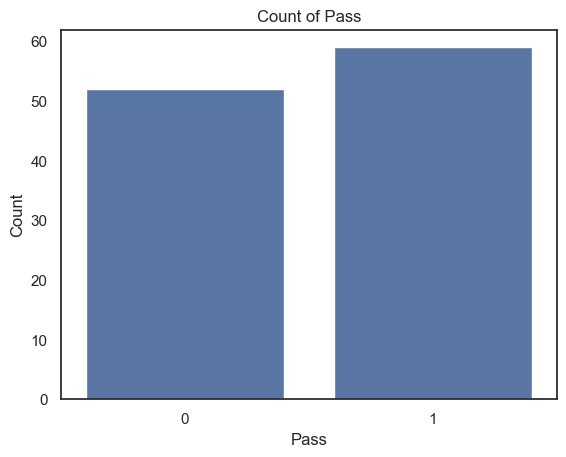

In [84]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.xlabel('Pass')
plt.ylabel('Count')
plt.title("Count of Pass")
sns.countplot(data=data, x='Pass')
plt.show()

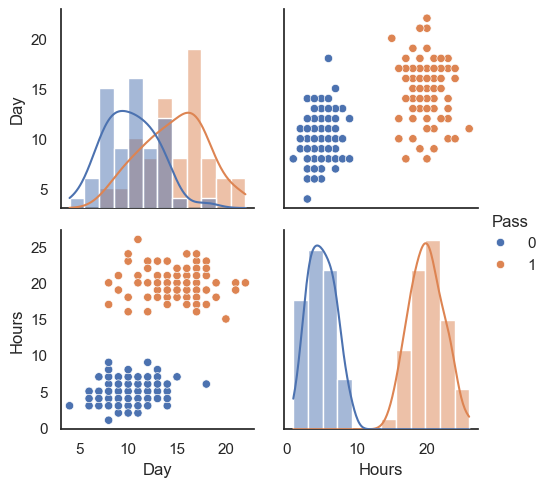

In [85]:
sns.set_style(style='white')
g = sns.PairGrid(data=data, hue="Pass")
g.map_diag(sns.histplot, kde=True, bins=12)
g.map_offdiag(sns.scatterplot)
g.add_legend()

sử dụng Seaborn để tạo một lưới biểu đồ (PairGrid):

sns.set_style(style="white"): Thiết lập kiểu dáng cho biểu đồ là "white", giúp nền của biểu đồ sáng và dễ nhìn hơn.
g = sns.PairGrid(data=data, hue="Pass"): Tạo một lưới biểu đồ (PairGrid) để hiển thị mối quan hệ giữa tất cả các cặp biến trong DataFrame data.
data=data: Chỉ định DataFrame chứa dữ liệu.
hue="Pass": Phân loại dữ liệu theo cột "Pass", cho phép thấy sự khác biệt giữa các lớp (pass và non-pass) trên biểu đồ.
g.map_diag(sns.histplot, kde=True, bins=12):
Vẽ biểu đồ histogram cho các biến ở trên đường chéo (diagonal) của lưới, sử dụng hàm histplot.

kde=True: Thêm đường phân phối (Kernel Density Estimate) vào histogram, giúp thấy phân bố của dữ liệu rõ hơn.

bins=12: Số lượng bins (khung) cho histogram là 12.

g.map_offdiag(sns.scatterplot):
Vẽ biểu đồ phân tán (scatter plots) cho các cặp biến không nằm trên đường chéo (off-diagonal) của lưới, giúp thấy mối quan hệ giữa các biến.

## 1.2 Preprocessing

In [86]:
df = data.to_numpy()

In [87]:
from typing import List
from sklearn.model_selection import train_test_split

def t() -> List[ndarray]:
  return train_test_split(df[:,0:2] , df[:, -1] , test_size=0.2, stratify=df[:,-1], random_state=123)

X_test, X_train , y_test , y_train =t()

print(X_test.shape , X_train.shape)
print(y_test.shape, y_train.shape)

(88, 2) (23, 2)
(88,) (23,)


In [88]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler = StandardScaler(): Tạo một đối tượng StandardScaler từ thư viện scikit-learn. StandardScaler được sử dụng để chuẩn hóa (normalize) dữ liệu, giúp đưa các đặc trưng về cùng một quy mô. Phương pháp chuẩn hóa này sẽ trừ đi giá trị trung bình và chia cho độ lệch chuẩn, biến đổi dữ liệu sao cho có trung bình bằng 0 và độ lệch chuẩn bằng 1.
X_train = scaler.fit_transform(X_train): Phương thức fit_transform sẽ tính toán các tham số chuẩn hóa (giá trị trung bình và độ lệch chuẩn) từ tập dữ liệu huấn luyện (X_train) và áp dụng biến đổi đó lên X_train. Kết quả là X_train sẽ được chuẩn hóa.
X_test = scaler.transform(X_test): Phương thức transform sẽ sử dụng các tham số đã được tính toán từ tập huấn luyện để chuẩn hóa dữ liệu trong tập kiểm tra (X_test). Điều này đảm bảo rằng dữ liệu kiểm tra được chuẩn hóa theo cùng một quy trình như dữ liệu huấn luyện, giúp mô hình có thể hoạt động chính xác hơn khi dự đoán.
 

# Model training and Evaluation

Có nhiều mô hình phân loại có thể giải quyết bài toán, ví dụ: logistic, mulilayer perceptrons, nhưng chua biết rõ hiệu suất mô hình nào sẽ tốt hơn cho bộ data này. Vì vậy, cần kiểm thử cả 2 mô hình (kèm theo cả tinh chỉnh siêu tham số cho mô hình) để chọn ra mô hình có hiệu năng tôt nhất


Cross-validation giúp đảm bảo rằng mô hình không bị quá khớp (overfitting) hoặc thiếu khớp (underfitting) bằng cách đánh giá mô hình trên các tập con khác nhau của dữ liệu huấn luyện.

Trong GridSearchCV, cross-validation được thực hiện tự động cho mỗi tổ hợp siêu tham số.GridSearchCV sẽ hoạt động như sau:

Xác định lưới siêu tham số: cung cấp một từ điển với các siêu tham số và danh sách các giá trị muốn thử nghiệm.

Cross-validation: Với mỗi tổ hợp siêu tham số, mô hình sẽ được huấn luyện và đánh giá bằng cross-validation (ví dụ cv=5 có nghĩa là chia dữ liệu training data thành 5 phần). Mô hình sẽ được huấn luyện trên 4 phần và kiểm đinh (validation) trên 1 phần (ví dụ như ở split1: mô hình training trên fold2 đến fold5, đánh giá hiệu suất trên fold1), quá trình này lặp lại 5 lần với mỗi tập kiểm định (validation) khác nhau

Tính trung bình hiệu suất: Sau khi thực hiện cross-validation cho một tổ hợp siêu tham số, GridSearchCV sẽ tính trung bình hiệu suất (ví dụ độ chính xác) của 5 lần chạy (từ split 1 đến split5).

Tập hợp siêu tham số tốt nhất: Cuối cùng, GridSearchCV sẽ lưu trữ tổ hợp siêu tham số tốt nhất cùng với mô hình đã huấn luyện lại trên toàn bộ dữ liệu huấn luyện với siêu tham số đó (nếu refit=True).

=> Sau khi dùng GridSearchCV để tìm ra bộ siêu tham số tốt nhất cho mô hình, bộ test data sẽ được sử dụng để đánh giá kết quả cuối cùng cho mô hình

In [89]:


class ModelsAI(TypedDict):
  MLP: MLPClassifier
  LR : LogisticRegression


# định nghĩa 2 mô hình muốn so sánh và tuning
models: ModelsAI = {
  'MLP': MLPClassifier(),
  'LR' : LogisticRegression() ,
  }


In [94]:
class ParamsMLP(TypedDict):
  hidden_layer_sizes : List[tuple]   # cấu trúc mạng nơ-ron; ảnh hưởng đến khả năng học của mô hình
  activation: List[str]               # Hành kích hoạt; quyết định cac nơ-ron kích hoạt và học
  solver: List[str]                   # Thuật toán tối ưu hóa ảnh hưởng đến tốc dộ và hiệu quả của quá trính huấn luyện
  # alpha: list[int] = []             # Hệ số regularization; ngăn ngừa overfitting.
  learning_rate: List[str]            # Tốc độ học; ảnh hưởng đến cách cập nhật trọng số.
  # batch_size: List[int]             # Kích thước batch; ảnh hưởng đến hiệu suất và thời gian huấn luyện.
  # max_iter: List[str]               # Số vòng lặp tối đa; đảm bảo mô hình hội tụ.

params_mlp:ParamsMLP = {
  'hidden_layer_sizes': [(3,), (3,3)],
  'activation': ['relu' , 'tanh'], #
  'solver': ['adam' , 'sgd'],
  'learning_rate': ['constant', 'adaptive'],
}

- hidden_layer_sizes: Xác định cấu trúc của các lớp ẩn trong mạng nơ-ron. Ví dụ, (3,) chỉ một lớp ẩn với 3 nơ-ron, trong khi (3, 3) chỉ hai lớp ẩn, mỗi lớp có 3 nơ-ron.
- activation: Xác định hàm kích hoạt cho các lớp ẩn. Hàm kích hoạt quyết định cách các đầu ra của lớp ẩn được tính toán và truyền đến lớp tiếp theo.
- solver: Xác định thuật toán tối ưu hóa được sử dụng để cập nhật trọng số của mô hình. adam: Phương pháp tối ưu hóa hiệu quả với tốc độ học tự điều chỉnh và thường hoạt động tốt trong các bài toán học sâu. sgd: Stochastic Gradient Descent là một lựa chọn cơ bản và có thể hữu ích trong các bài toán lớn với việc chọn kích thước batch phù hợp.
- alpha: Hệ số điều chỉnh regularization. Regularization giúp ngăn ngừa overfitting bằng cách thêm một khoản phạt vào hàm mất mát.
- learning_rate: Xác định cách tốc độ học được điều chỉnh trong quá trình huấn luyện. constant: Tốc độ học cố định giúp dễ dàng kiểm soát tốc độ học và thường là điểm khởi đầu tốt. adaptive: Điều chỉnh tốc độ học khi mô hình học kém hơn và có thể giúp cải thiện hiệu suất nếu tốc độ học cần điều chỉnh trong suốt quá trình huấn luyện.
- batch_size: Kích thước batch; ảnh hưởng đến hiệu suất và thời gian huấn luyện.
- max_iter: Xác định số vòng lặp tối đa để huấn luyện mô hình. Nếu mô hình không hội tụ sau số vòng lặp này, quá trình huấn luyện sẽ dừng lại.

In [95]:
class ParamsLR(TypedDict):
  C:ndarray[Any, dtype[floating[Any]]]
  penalty: List[str]
  solver: List[str]

params_lr:ParamsLR = {
  'C': np.logspace(-2,2, 5),
  'penalty': ['l1', 'l2'],
  'solver': ['liblinear' , 'saga']
}

- C: Đây là cường độ điều chỉnh, hay là nghịch đảo của sức mạnh điều chỉnh. Giá trị nhỏ hơn tương ứng với việc điều chỉnh mạnh hơn. Điều chỉnh C giúp cân bằng giữa độ chính xác trên tập huấn luyện và khả năng tổng quát của mô hình. Giá trị nhỏ hơn của C giúp giảm overfitting (bằng cách tăng điều chỉnh), trong khi giá trị lớn hơn có thể dẫn đến overfitting nếu mô hình quá phức tạp.

- penalty: Loại hình phạt được áp dụng trong quá trình tối ưu hóa. l1 là hình phạt lasso, giúp chọn lọc biến, và l2 là hình phạt ridge, giúp giảm độ lớn của các hệ số. Hình phạt giúp kiểm soát độ phức tạp của mô hình và giảm nguy cơ overfitting. l1 có thể tạo ra các mô hình đơn giản hơn bằng cách loại bỏ một số đặc trưng, trong khi l2 thường giúp cải thiện khả năng tổng quát bằng cách điều chỉnh toàn bộ các hệ số.

- solver: Thuật toán được sử dụng để tối ưu hóa hàm mất mát. liblinear là thuật toán giải tích cho các bài toán nhỏ, trong khi saga là thuật toán tối ưu hóa gradient với hỗ trợ cho cả l1 và l2. Việc chọn solver ảnh hưởng đến tốc độ và hiệu quả của quá trình huấn luyện. liblinear thường được sử dụng cho dữ liệu nhỏ, trong khi saga hoạt động tốt hơn với dữ liệu lớn và hỗ trợ điều chỉnh l1.

In [96]:
class HyperParamters(TypedDict):
  MLP: ParamsMLP
  LR: ParamsLR

hyper_paramerers:HyperParamters = {
  'MLP': params_mlp,
  'LR': params_lr
}


GridSearchCV(estimator, param_grid, , scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2n_jobs', error_score=nan, return_train_score=False)

 - estimator: Đây là mô hình muốn tinh chỉnh
 - param_grid: Là từ điển chứa các siêu tham số và các giá trị tương ứng muốn thử nghiệm. Đây chính là "lưới" siêu tham số mà GridSearchCV sẽ tìm kiếm.
 - cv: Là số lần cross-validation (số fold) muốn sử dụng. Với cv=5, dữ liệu training sẽ được chia thành 5 tập con (folds), mỗi tập được dùng làm tập kiểm tra một lần và huấn luyện trên 4 tập còn lại.
 - scoring: Đây là tiêu chí đánh giá mô hình, chẳng hạn như accuracy, precision, recall, f1. Nếu không chỉ định, mặc định sẽ là tiêu chí của mô hình cụ thể, chẳng hạn accuracy với các bài toán phân loại.
 - n_jobs: Xác định số lượng CPU sử dụng khi chạy tìm kiếm song song. n_jobs=-1 nghĩa là sử dụng tất cả các CPU có sẵn.

In [99]:
# thực hiện tuning hyperparameters bằng GridSearch
from sklearn.model_selection import GridSearchCV

class Tuning(TypedDict):
  MLP :GridSearchCV
  LR: GridSearchCV

model_tuning:Tuning = {}

for k, v in models.items():
  grid_search = GridSearchCV(v , hyper_paramerers[k] , cv=5, n_jobs=12 , scoring=('f1') , return_train_score=True, error_score=0, verbose=3)
  grid_search.fit(X_train, y_train)
  model_tuning[k] = grid_search

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


d:\ai-srv\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [100]:
best_score:List[float] = [
  model_tuning['LR'].best_score_,
  model_tuning['MLP'].best_score_
]

print(model_tuning)

{'LR': GridSearchCV(cv=5, error_score=0, estimator=LogisticRegression(), n_jobs=12,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='f1', verbose=3), 'MLP': GridSearchCV(cv=5, error_score=0, estimator=MLPClassifier(), n_jobs=12,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(3,), (3, 3)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             return_train_score=True, scoring='f1', verbose=3)}


Nhận xét: MultiLayerPeceptron có best_score nhỏ hơn best_score LogisticRegression => chọn mô hình LogisticRegression vì có hiệu năng tốt hơn (sau khi tinh chỉnh siêu tham số trên 1 số khoảng giá trị thực nghiệm)

In [101]:
idx = best_score.index(max(best_score))
model_name = list(model_tuning.keys())[idx]
model_name

'LR'

In [106]:
# Đánh giá model trên trập dữ liệu kiểm tra
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score


best_model =  model_tuning['LR']
y_pred =  best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 =f1_score(y_test, y_pred)

print (f"Accuracy: {accuracy}, precision: {precision}, recall: {recall}, f1: {f1}")


Accuracy: 1.0, precision: 1.0, recall: 1.0, f1: 1.0


Text(92.25, 0.5, 'truth')

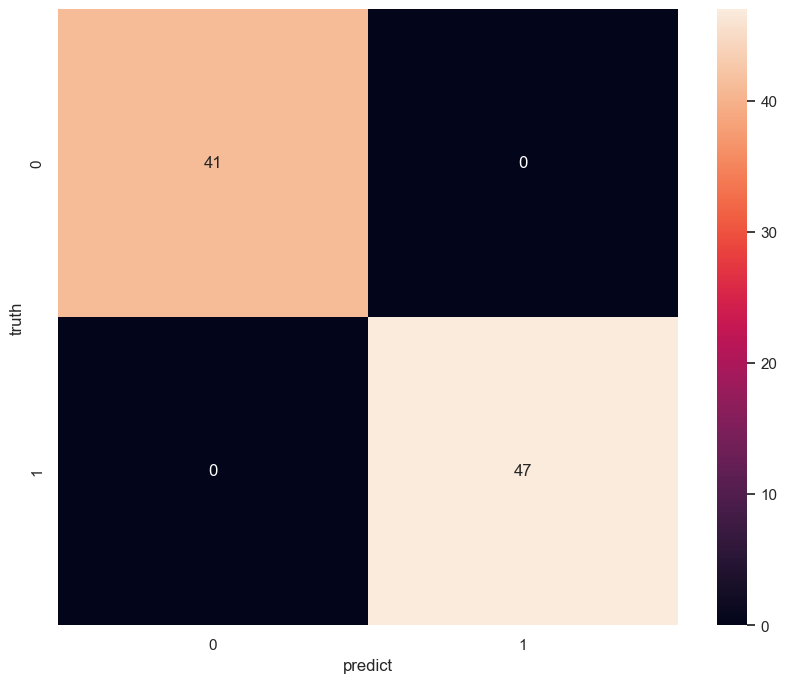

In [107]:
# ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix


cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True)
plt.xlabel('predict')
plt.ylabel('truth')

In [111]:
# lưu lại model thành file để tái sử dụng cho các lần sau
import joblib


joblib.dump(best_model, './models/examdatasetsad.pkl')

['./models/examdatasetsad.pkl']

In [117]:
# load model từ file và sử dụng
clf_from_joblib = joblib.load('./models/examdatasetsad.pkl')
clf_from_joblib.predict(X_test)


array([1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1.])